The matrix required for polynomial fit  [[18.0, 1072.0, 73760.0], [59.55555555555556, 9916.444444444445, 1152398.222222222], [4097.777777777777, 116.21082825385449, 4186183.22839725]]
Inverse Exists and determinant is  2543065402259.8486


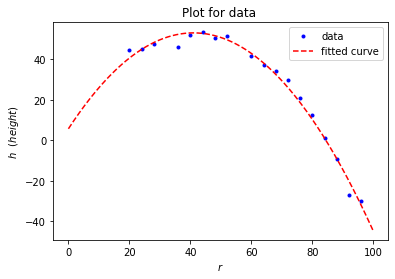

R_max is  41.01216025882073 m
Hence Highest reach H_max is  53.09352660229107 m


In [1]:
#Question 4

from My_Lib import *
import math
import matplotlib.pyplot as plt
import numpy as np

#making lists for appending the data as given
A=[]
X=[] 
Y=[]
with open("esem_fit2.dat") as C:
    for k in C:
        A.append(list(map(float, k.split())))
for i in range(len(A)):
    X.append(float(A[i][0]))  #Appending datas for X as temperature 
    Y.append(float(A[i][-1])) #Appending datas for Y as conductivity

result=[]
result=polynomial_curve_fitting(X,Y,2) # '2' calling polynomial fit because quadratic fit is given h = a0 + a1r + a2r^2




x = np.arange(0, 100,0.2)
y=result[0]+result[1]*x+result[2]*x**2
plt.plot(X, Y,'b.',label="data")
plt.plot(x,y,'--r',label="fitted curve")

plt.xlabel("$r$")
plt.ylabel("$h~~(height)$")
plt.legend()
plt.title("Plot for data ")
plt.show()



#HIGHEST REACH #Differentiate at dh/dr at r=0
#After diffrentiating we get  

def dhdr(r):
    return result[1]+2*result[2]*r

root_val,t,r=Newton_Raphson_Method(dhdr,0,10**(-4)) #calling newton rhapson for finding value of r
print("R_max is ",root_val,"m")


h=result[0]+result[1]*root_val+result[2]*root_val**2 #putting that value of r
print("Hence Highest reach H_max is ",h,"m")